# Assignment 2: Classification and Evaluation (20 marks)

Student Name: Jiahao Shen

Student ID: 1381187

## General info

<b>Due date</b>: *5 pm on Friday 7th of April*

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2;</li>
    <li>two days late, -4;</li>
    <li>three days late, -6;</li>
    <li>four days late, -8;</li>
    <li>five days late, -10;</li>
</ul>

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page] on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages `numpy`, `pandas`, `matplotlib` and `sklearn`. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 


<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on Canvas>Assignments>Assignmnet1; we recommend you check it regularly.

<b>Academic misconduct</b>: This assignment is an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where collusion or plagiarism are deemed to have taken place. Content produced by an AI (including, but not limited to ChatGPT) is not your own work, and submitting such content will be treated as a case of academic misconduct, in line with the <a href="https://academicintegrity.unimelb.edu.au/plagiarism-and-collusion/artificial-intelligence-tools-and-technologies"> University's policy</a>.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>Missing Authorship Declaration at the bottom of the page, -2.0
<LI>Incomplete or unsigned Authorship Declaration at the bottom of the page, -1.0
</UL>


## Overview:
For this assignment, you will work with a provided dataset to train and utilize multiple classifiers to analyze different versions of the dataset. In addition to implementing these classifiers, you will also explore various evaluation paradigms and analyze the impact of multiple parameters on the performance of the classifiers. Finally, you will be expected to answer some conceptual questions based on your observations and analysis.

## Data Set:
In this assignment, you will work with multiple versions of one dataset called "Amphibians." It is adopted from a famous public dataset, and you can find more details about it <a href= "https://archive.ics.uci.edu/ml/datasets/Amphibians#"> here </a>.  The dataset includes information about five groups of amphibians in Poland: "Green frogs," "Brown frogs," "Common toad," "Tree frog," and "Fire-bellied toad." The dataset comprises 14 attributes and one class. Some of these attributes are numeric, some are categorical, and some are ordinal.

You can find details about all the features in the dataset in the file "README.txt".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
import warnings

# ignore future warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## Question 1 [5 marks]
**Q1.1 A.** Read the dataset "amphibians1.csv" dataset into a pandas DataFrame called `data1`. Create a function called `encode` that takes in the features of the dataset as a pandas DataFrame and uses one-hot encoding to convert all nominal (and ordinal) attributes to numeric. You can achieve this by either using `get_dummies()` from the pandas library or `OneHotEncoder()` from the scikit-learn library. **[1 mark]**

**B.** For 10 rounds, use `train_test_split` to divide the encoded `data1` into 70% train, 30% test . Set the `random_state` equal to the loop counter. For example in the loop
``` python 
for i in range(10):
```
make `random_state` equal to `i`. 
Use the splitted datasets to train and test the following models (use the default hyperparameters): **[1 mark]**
- Zero-R
- Gaussian Naive Bayes
- Multinomial Naive Bayes
- Bernoulli Naive Bayes model

Report the average accuracy over the 10 runs.

In [4]:
data1 = pd.read_csv("amphibians1.csv")

y1 = data1.iloc[:, -1]
X1 = data1.iloc[:, :-1]

In [5]:
# preprocessing
def encode(X):
    # your code here
    categorical_features = ['TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'RR', 'BR', 'MR', 'CR']
    X_trans = pd.get_dummies(X, columns=categorical_features)
    return X_trans

In [6]:
ZeroR_Acc_1 = []
GNB_Acc_1 = []
MNB_Acc_1 = []
BNB_Acc_1 = []

# your code here
X_encode = encode(X1)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_encode, y1, test_size=0.30, random_state=i)

    zeror = DummyClassifier(strategy="most_frequent")
    zeror.fit(X_train, y_train)
    acc = zeror.score(X_test, y_test)
    # print("ZeroR score %f " % acc)
    ZeroR_Acc_1.append(acc)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    # print("GNB score %f " % acc)
    GNB_Acc_1.append(acc)

    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    # print("MNB score %f " % acc)
    MNB_Acc_1.append(acc)

    bnb = BernoulliNB()
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    # print("BNB score %f " % acc)
    BNB_Acc_1.append(acc)

print("Accuracy of ZeroR:", np.mean(ZeroR_Acc_1).round(2))
print("Accuracy of GNB:", np.mean(GNB_Acc_1).round(2))
print("Accuracy of MNB:", np.mean(MNB_Acc_1).round(2))
print("Accuracy of BNB:", np.mean(BNB_Acc_1).round(2))

Accuracy of ZeroR: 0.59
Accuracy of GNB: 0.4
Accuracy of MNB: 0.35
Accuracy of BNB: 0.63


**Q1.2** After comparing the performance of the different models on the classification task, please comment on any differences or lack of differences you observe between the models. **[3 marks]**</br>
*NOTE: You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

*Answer Here*

#### Q1.2 Answer

Based on the results using the `classification_report` function, here are the differences and lack of differences between the models:

**Differences:**
<1> Overall accuracy: The BNB model has the highest overall accuracy (0.72), followed by ZEROR (0.63), GNB (0.46), and MNB (0.35). This indicates that the BNB model performs better in classifying the frog species in this dataset. The possible reason for this is that the BNB model assumes that the input features are binary (i.e. 0 or 1), whereas after using one-hot encoding to convert the categorical features to binary features, those features have only 0 or 1 values, which makes the BNB model more suitable for this dataset.

<2> Precision, Recall, and F1-score: The BNB model consistently has higher precision, recall, and F1-score across most classes, except for Common toad, which has a perfect score in GNB. In contrast, the ZEROR model has the lowest performance in these metrics for Brown frog, Common toad, and Tree frog classes, because it only predicts the majority class (Green frog) for all instances, without considering any feature values.

<3> Presence of Fire-bellied toad: The GNB and MNB models include the Fire-bellied toad class in their results, despite having no samples in the dataset, while ZEROR and BNB do not.

**Lack of Differences:**
<1> All models show relatively poor performance when classifying Fire-bellied toad, Common toad, and Tree frog instances. This is due to the limited number of samples for these classes, which makes it difficult for the models to learn and generalize well. In this dataset, there is only 3 samples for Fire-bellied toad, 7 samples for Common toad, and 4 samples for Tree frog.


In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X_encode, y1, test_size=0.30, random_state=0)
#
# zeror.fit(X_train, y_train)
# zeror_predictions = zeror.predict(X_test)
#
# gnb.fit(X_train, y_train)
# gnb_predictions = gnb.predict(X_test)
#
# mnb.fit(X_train, y_train)
# mnb_predictions = mnb.predict(X_test)
#
# bnb.fit(X_train, y_train)
# bnb_predictions = bnb.predict(X_test)
#
# print("\n\n ===========\n ZEROR FULL RESULTS\n===========")
# print(classification_report(y_test, zeror_predictions))
#
# print("\n\n ===========\n GNB FULL RESULTS\n===========")
# print(classification_report(y_test, gnb_predictions))
#
# print("\n\n ===========\n MNB FULL RESULTS\n===========")
# print(classification_report(y_test, mnb_predictions))
#
# print("\n\n ===========\n BNB FULL RESULTS\n===========")
# print(classification_report(y_test, bnb_predictions))


## Question 2 [5 marks]

**Q2.1.** Divide the `data1` into 70% train and 30% test splits for 10 rounds, set the `random_state` equal to the loop counter. Then, train and test **K-Nearest Neighbor algorithms (with K values of 1, 5, and 20)**, using Euclidean distance as the distance metric and maximum vote (no weighting) to determine the label. Finally, report the average accuracy of the KNN models over the 10 runs. **[1 mark]**

In [8]:
KNN1_Acc_1 = []
KNN5_Acc_1 = []
KNN20_Acc_1 = []

# your code here
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_encode, y1, test_size=0.30, random_state=i)

    knn1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform')
    knn1.fit(X_train, y_train)
    acc = knn1.score(X_test, y_test)
    KNN1_Acc_1.append(acc)

    knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
    knn5.fit(X_train, y_train)
    acc = knn5.score(X_test, y_test)
    KNN5_Acc_1.append(acc)

    knn20 = KNeighborsClassifier(n_neighbors=20, metric='euclidean', weights='uniform')
    knn20.fit(X_train, y_train)
    acc = knn20.score(X_test, y_test)
    KNN20_Acc_1.append(acc)

print("Accuracy of KNN(1):", np.mean(KNN1_Acc_1).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_1).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_1).round(2))


Accuracy of KNN(1): 0.56
Accuracy of KNN(5): 0.6
Accuracy of KNN(20): 0.61


**Q2.2.A.** Create a function called `normalise` that takes the features of the dataset as a pandas DataFrame and scales all numeric attributes to the range of 0-1. You can either use `MinMaxScaler` from the `sklearn.preprocessing` library or implement the normalization step yourself.
**B.** For 10 rounds divide the normalised "data1" into 70% train and 30% test splits using set the `random_state` equal to the loop counter, and run the KNN models (k=1,5 and 20). Report the average accuracy of your KNN models over these 10 runs. **[1 mark]**

In [9]:
# preprocessing
def normalise(X):
    # your code here
    numeric_features = ['SR', 'NR', 'OR']
    X_trans = X.copy()
    for feature in numeric_features:
        min_value = X[feature].min()
        max_value = X[feature].max()
        X_trans[feature] = (X[feature] - min_value) / (max_value - min_value)
    return X_trans

In [10]:
######################################## POSSIBLE SOLUTION #############################################

KNN1_Acc_2 = []
KNN5_Acc_2 = []
KNN20_Acc_2 = []

# your code here
X_encode_normalise = normalise(X_encode)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_encode_normalise, y1, test_size=0.30, random_state=i)

    knn1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform')
    knn1.fit(X_train, y_train)
    acc = knn1.score(X_test, y_test)
    KNN1_Acc_2.append(acc)

    knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
    knn5.fit(X_train, y_train)
    acc = knn5.score(X_test, y_test)
    KNN5_Acc_2.append(acc)

    knn20 = KNeighborsClassifier(n_neighbors=20, metric='euclidean', weights='uniform')
    knn20.fit(X_train, y_train)
    acc = knn20.score(X_test, y_test)
    KNN20_Acc_2.append(acc)

print("Accuracy of KNN(1):", np.mean(KNN1_Acc_2).round(2))
print("Accuracy of KNN(5):", np.mean(KNN5_Acc_2).round(2))
print("Accuracy of KNN(20):", np.mean(KNN20_Acc_2).round(2))


Accuracy of KNN(1): 0.54
Accuracy of KNN(5): 0.58
Accuracy of KNN(20): 0.63


**Q2.3** Compare the results of the KNN models (for each value of K) in Q2.1 and Q2.2, and discuss any differences you observe. Did the preprocessing step in Q2.2 improve the performance of the KNN models? Why or why not? **[3 marks]**

*Answer Here*

#### Q2.3 Answer
KNN(1): The accuracy slightly decreases from 0.56 before normalization to 0.54 after normalization.

KNN(5): The accuracy also slightly decreases from 0.6 before normalization to 0.58 after normalization.

KNN(20): The accuracy increases from 0.61 before normalization to 0.63 after normalization.

Based on these results, the preprocessing step (normalization) in Q2.2 does not consistently improve the performance of the KNN models for k=1 and k=5. However, the performance of the KNN(20) model does improve after normalization.

Normalization can improve the performance of KNN models because it scales numerical features to the range of 0-1, preventing features with larger magnitudes (e.g. SR, which mainly ranges from -50 to 8000) from dominating the distance calculations. However, in this case, the improvement is not consistent across different values of k. This could be due to the fact that the dataset is small, and the features are not very different in magnitude. Therefore, the normalization step does not have a significant impact on the performance of the KNN models.


## Question 3 [5 marks]

**Q3.1.** Read the "amphibians2.csv" into `data2` and  "amphibians1.csv" into `data1_2`. Observe any differences in the values of the feature "SR" between these two datasets, and explain why you think these changes were made (provide your hypothesis). Use diagrams such a histograms or boxplots to check the distribution of the feature 'SR' before and after the change. **[2 marks]**

In [11]:
data2 = pd.read_csv("amphibians2.csv")
data1_2 = pd.read_csv("amphibians1.csv")

<AxesSubplot:>

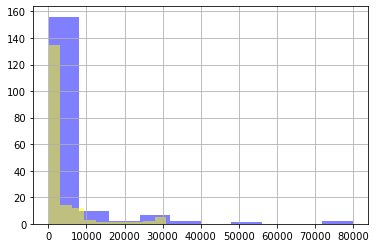

In [12]:
# your code here
data1_2['SR'].hist(color='blue', alpha=0.5)
data2['SR'].hist(color='yellow', alpha=0.5)
# print(data1_2['SR'].value_counts(bins=10))
# print(data2['SR'].value_counts(bins=10))

*Answer Here*

#### Q3.1 Answer
Upon observation, it was found that in "amphibians2.csv" (data2), the values of the feature "SR" are more compact, with most of the data concentrated in the 0-3,000 range. This is in contrast to "amphibians1.csv" (data1_2), where most of the values range from -50 to 8,000. The following are my hypotheses for the changes made to the "SR" feature:

<1> Since the values of the feature "SR" were observed to be much larger than those of the other features, compressing the value range of the "SR" feature might have been done to reduce the scale differences between the features. When features have different scales, machine learning models may assign excessive weight to larger-valued features, which can negatively impact model performance. By reducing the value range of the "SR" feature, a more balanced data handling by the model can be ensured.

<2> In data1_2, the "SR" feature contains several negative values, which should be positive since they represent the reservoir's surface area in square meters. In addition, the extreme values in the "SR" feature (i.e. values greater than 8,000) could also have an impact on the model's performance. By removing the negative and extreme large values, the model's performance can be improved. A potential approach to compress the data could involve converting the area units from square meters to larger area units.


**Q3.2** 
For 10 rounds split the `data2` and `data1_2` dataset into 70% training and 30% testing sets use the `random_state` equal to the loop counter. Train and test two **decision tree** classifier with all default hyper-parameters: one with `data1_2` and one with `data2`. Calculate and report the average accuracy of both models for 10 runs. **[1 mark]**

In [13]:
y1_2 = data1_2.iloc[:, -1]
X1_2 = data1_2.iloc[:, :-1]

y2 = data2.iloc[:, -1]
X2 = data2.iloc[:, :-1]


In [14]:
DT_Acc_1_2 = []
DT_Acc_2 = []

# your code here
for i in range(10):
    X_train1_2, X_test1_2, y_train1_2, y_test1_2 = train_test_split(X1_2, y1_2, test_size=0.3, random_state=i)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=i)

    DT1_2 = DecisionTreeClassifier(random_state=0)
    DT1_2.fit(X_train1_2, y_train1_2)
    acc = DT1_2.score(X_test1_2, y_test1_2)
    DT_Acc_1_2.append(acc)

    DT2 = DecisionTreeClassifier(random_state=0)
    DT2.fit(X_train2, y_train2)
    acc = DT2.score(X_test2, y_test2)
    DT_Acc_2.append(acc)

print("Accuracy of Decision Tree \tdata1_2:", np.mean(DT_Acc_1_2).round(2), "\tdata2:", np.mean(DT_Acc_2).round(2))

Accuracy of Decision Tree 	data1_2: 0.53 	data2: 0.53


**Q3.3** Compare and analyze the performance of the **decision tree** classifier on `data1_2` and `data2`. Discuss any differences or similarities that you observe in the performance of these models. Does the change made to the dataset improve the performance of the model? Explain why or why not and elaborate on your hypothesis from Q3.1. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.*

*Answer Here*

#### Q3.3 Answer

In comparing the performance of the decision tree classifier on data1_2 and data2, it is observed that the average accuracy is 0.53 for both datasets. This indicates that the model's performance is similar on both datasets. Based on this result, it can be inferred that the changes made to the dataset did not improve the model's performance.

Observing the classification_report, there are some differences in the model's performance on the two datasets. On data1_2, the model has a higher accuracy for Green frogs (0.80), while on data2, the model has a higher accuracy for Tree frogs (0.50). Additionally, on data1_2, recall, F1 score, and weighted average accuracy are higher, whereas on data2, macro average accuracy and precision are higher.

According to the hypothesis formulated in Q3.1, it was expected that compressing the "SR" feature would have a positive impact on the model's performance. However, in practice, this change did not improve the model's performance. This could be because decision tree classifiers are not sensitive to the different scales of features, and as a result, the compression of the "SR" feature may have limited impact on the performance of this model.


In [15]:
# X_train1_2, X_test1_2, y_train1_2, y_test1_2 = train_test_split(X1_2, y1_2, test_size=0.3, random_state=0)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=0)
#
# DT1_2.fit(X_train1_2, y_train1_2)
# DT1_2_pred = DT1_2.predict(X_test1_2)
#
# DT2.fit(X_train2, y_train2)
# DT2_pred = DT2.predict(X_test2)
#
# print(classification_report(y_test1_2, DT1_2_pred))
# print(classification_report(y_test2, DT2_pred))

## Question 4

**Q4.1** Read the "amphibians3.csv" into data3. Use histogram diagrams to compare the distribution of class labels between `data1` and `data3`. Observe the changes on the distribution of the class labels and explain in your own words why you think these changes have been made.**[2 marks]**

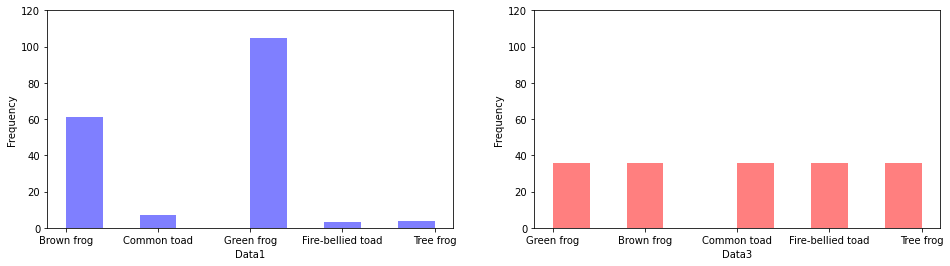

In [16]:
data3 = pd.read_csv("amphibians3.csv")

# your code here
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(121)
ax1.hist(data1['frog class'], alpha=0.5, color='blue')
ax1.set_ylim(0, 120)
ax1.set_xlabel('Data1')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot(122)
ax2.hist(data3['frog class'], alpha=0.5, color='red')
ax2.set_ylim(0, 120)
ax2.set_xlabel('Data3')
ax2.set_ylabel('Frequency')

plt.show()
# print(data1['frog class'].value_counts())
# print(data3['frog class'].value_counts())

**Q4.2** Use the same encoding technique as used in Q1.1 to encode the `data3` dataset and apply the same normalization technique as used in Q2.1 to normalise the data. For 10 rounds, split the encoded and normalized data3 into 70% training and 30% testing sets,  set the `random_state` equal to the loop counter. Train and test the following models using `data3`: **[1 mark]**
- Zero-R
- K-Nearest Neighbour (K = 1, 5 and 20) 

Calculate the average accuracy of the models for 10 runs and report the results.


In [17]:
y3 = data3.iloc[:, -1]
X3 = data3.iloc[:, :-1]

In [18]:
ZeroR_Acc_3 = []
KNN1_Acc_3 = []
KNN5_Acc_3 = []
KNN20_Acc_3 = []

# your code here
X3_encode = encode(X3)
X3_encode_normalise = normalise(X3_encode)

for i in range(10):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_encode_normalise, y3, test_size=0.3, random_state=i)

    ZeroR = DummyClassifier(strategy='most_frequent')
    ZeroR.fit(X_train3, y_train3)
    acc = ZeroR.score(X_test3, y_test3)
    ZeroR_Acc_3.append(acc)

    KNN1 = KNeighborsClassifier(n_neighbors=1)
    KNN1.fit(X_train3, y_train3)
    acc = KNN1.score(X_test3, y_test3)
    KNN1_Acc_3.append(acc)

    KNN5 = KNeighborsClassifier(n_neighbors=5)
    KNN5.fit(X_train3, y_train3)
    acc = KNN5.score(X_test3, y_test3)
    KNN5_Acc_3.append(acc)

    KNN20 = KNeighborsClassifier(n_neighbors=20)
    KNN20.fit(X_train3, y_train3)
    acc = KNN20.score(X_test3, y_test3)
    KNN20_Acc_3.append(acc)

print("Accuracy of ZeroR: \tdata1:", np.mean(ZeroR_Acc_1).round(2), "\tdata3:", np.mean(ZeroR_Acc_3).round(2))
print("Accuracy of KNN(1): \tdata1:", np.mean(KNN1_Acc_2).round(2), "\tdata3:", np.mean(KNN1_Acc_3).round(2))
print("Accuracy of KNN(5): \tdata1:", np.mean(KNN5_Acc_2).round(2), "\tdata3:", np.mean(KNN5_Acc_3).round(2))
print("Accuracy of KNN(20): \tdata1:", np.mean(KNN20_Acc_2).round(2), "\tdata3:", np.mean(KNN20_Acc_3).round(2))

Accuracy of ZeroR: 	data1: 0.59 	data3: 0.14
Accuracy of KNN(1): 	data1: 0.54 	data3: 0.76
Accuracy of KNN(5): 	data1: 0.58 	data3: 0.65
Accuracy of KNN(20): 	data1: 0.63 	data3: 0.44


**Q4.3** Discuss any differences you observe between the results of these KNN classifiers on data1 (Q2.2) and data3. **[2 marks]** </br>*NOTE:  You may need to compare other performance metrics of these models, such as precision and recall of each class label, to gain a better understanding of their performance. You can use the `classification_report` from `sklearn.metrics` for this matter and check the performance of the classifiers for one round.* 

*Answer Here*

#### Q4.3 Answer

Here are some of the differences between the results of the KNN classifiers on data1 and data3:

<1> Accuracy of ZeroR: The ZeroR classifier, which predicts the majority class, has an accuracy of 0.59 on data1 and 0.14 on data3. This is expected since data1 is imbalanced, and the majority class constitutes a significant portion of the dataset. In data3, the class distribution is balanced, so the ZeroR classifier's accuracy is approximately 1 divided by the number of classes (1/5 = 0.2), which is closer to the observed 0.14.

<2> Accuracy of KNN: In the KNN classifier (K=1, 5, 20), the accuracy of data3 is higher than data1 for K=1 and K=5, while for K=20, the accuracy of data1 is higher than data3. Therefore, the overall performance is improved, probably because the interference of the sample corresponding to the dominant label (Green frog) has been reduced.

<3> Effect of K: As the value of K increases, the accuracy of the KNN classifier on data1 improves (from 0.54 to 0.63), while it decreases on data3 (from 0.76 to 0.44). This may suggest that, in data1, a larger K value helps to mitigate the impact of class imbalance and noise, while in data3, a smaller K value is more suitable due to the balanced class distribution.

# Authorship Declaration:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: Jiahao Shen 1381187
   
   <b>Dated</b>: 04/04/2023